In [110]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 50)

%matplotlib inline
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neural_network import *
import numpy as np
from sklearn.metrics import *

import numpy as np

from ast import literal_eval
from sklearn.feature_extraction import FeatureHasher 
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from category_encoders import *

import matplotlib.pyplot as plt


In [111]:
data = pd.read_csv('data_pre_model.csv', index_col = 0)
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
5,1,2160554,G,C,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.022364,G,1.0,unknown,unknown,0.217631,23.700,R,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


In [112]:
training_data = data.copy()

encode = ["CHROM", "REF", "ALT", "IMPACT", "SYMBOL", "Feature", "Amino_acids", "STRAND", "SIFT", "Amino_acids_target", "PolyPhen", "BLOSUM", "IS_EXON"]
training_data[encode] = training_data[encode].apply(LabelEncoder().fit_transform)
training_data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0,1168180,2,1,['not_specified'],1,0,['missense_variant'],2,193,1644,0.033481,3,1,2,0,0.321582,1.053,3,0.10020,1,1.000000,5
1,0,1470752,2,0,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],2,2084,448,0.032646,12,0,1,0,0.313746,31.000,10,0.00000,1,1.000000,0
3,0,2160305,2,0,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],2,1845,1832,0.006362,5,1,4,3,0.217631,22.500,16,0.00000,1,0.142857,3
4,0,2160305,2,3,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],2,1845,1832,0.006362,5,1,4,3,0.217631,24.700,2,0.00000,1,0.142857,0
5,0,2160554,2,1,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],2,1845,1832,0.022364,5,1,4,3,0.217631,23.700,15,0.00000,1,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,3,2,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],1,684,61,0.354794,15,0,4,3,0.001580,0.105,0,0.13923,1,0.538462,7
65184,22,154159118,1,3,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],2,684,61,0.270573,17,0,2,0,0.001580,0.002,8,0.00130,1,0.538462,6
65185,22,154194886,1,3,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],1,684,61,0.099651,0,0,4,3,0.001580,12.850,0,0.01110,1,0.307692,7
65186,22,154490187,3,1,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],1,1668,1737,0.049780,16,0,4,3,0.255614,0.130,0,0.00030,1,1.000000,7


In [113]:
CLNDN_values = set()
data['CLNDN'].apply(literal_eval).apply(lambda x: CLNDN_values.update(x))
CLNDN_values

{'Loken_syndrome_8',
 'Legius_syndrome',
 'Nephrogenic_syndrome_of_inappropriate_antidiuresis',
 'Amyotrophic_lateral_sclerosis_type_1',
 '_zappella_variant',
 'Hemiplegia',
 'Common_Variable_Immune_Deficiency',
 '_Bain_type',
 'SALL4',
 'Hypoxemia',
 'F',
 'Coffin',
 'Thyroid_Hormone_Resistance',
 'Ruvalcaba_syndrome',
 'PITX2',
 'WREXHAM',
 'Immunodeficiency_20',
 '_variant_A',
 'Rigidity_and_multifocal_seizure_syndrome',
 'Mental_retardation_with_language_impairment_and_with_or_without_autistic_features',
 'Episodic_ataxia',
 'Hereditary_orotic_aciduria',
 'Seckel_syndrome_5',
 'de_Vries_syndrome',
 'Pontocerebellar_hypoplasia_type_1A',
 '_with_other_brain_malformations_1',
 'MACULAR_DEGENERATION',
 'Pigmented_nodular_adrenocortical_disease',
 'Neurodegeneration_with_brain_iron_accumulation_2b',
 'LCHAD_Deficiency',
 '_with_cardiac_involvement',
 'HEXOSAMINIDASE_B',
 'Early_infantile_epileptic_encephalopathy_14',
 'Renal_dysplasia_and_retinal_aplasia',
 'THYROTROPIN_RECEPTOR_POLYMOR

In [114]:
len(CLNDN_values)

4660

In [115]:
Consequence_values = set()
data['Consequence'].apply(literal_eval).apply(lambda x: Consequence_values.update(x))
Consequence_values

{'2KB_upstream_variant',
 '3_prime_UTR_variant',
 '500B_downstream_variant',
 '5_prime_UTR_variant',
 'intron_variant',
 'intron_variant&non_coding_transcript_variant',
 'missense_variant',
 'nonsense',
 'splice_acceptor_variant',
 'splice_donor_variant',
 'splice_region_variant',
 'splice_region_variant&synonymous_variant',
 'start_lost',
 'start_lost&splice_region_variant',
 'stop_gained',
 'stop_gained&splice_region_variant',
 'synonymous_variant'}

In [116]:
len(Consequence_values)

17

In [117]:
data['CLNDN'].apply(literal_eval).apply(len).mean(), data['Consequence'].apply(literal_eval).apply(len).max()

(3.8658936265783828, 4)

In [118]:
data[data['CLNDN'].apply(literal_eval).apply(len) > 10]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
40,1,12052716,C,T,"['Abnormality_of_the_teeth', 'Microcephaly', '...",1,0,['missense_variant'],MODERATE,MFN2,NM_001127660.1,0.017929,R,1.0,deleterious,probably_damaging,0.017800,34.00,W,0.00000,True,0.166667,-3.0
42,1,12058874,T,C,"['Charcot', 'Marie', 'Tooth_disease', '_axonal...",1,0,['missense_variant'],MODERATE,MFN2,NM_001127660.1,0.041514,F,1.0,deleterious,benign,0.017800,22.90,S,0.00000,True,0.333333,-2.0
137,1,46657799,C,T,"['Congenital_muscular_dystrophy', 'dystroglyca...",1,1,['missense_variant'],MODERATE,POMGNT1,NM_001243766.1,0.096973,V,-1.0,unknown,unknown,0.459000,20.90,I,0.00260,True,0.739130,3.0
147,1,53668099,C,T,['Carnitine_palmitoyltransferase_II_deficiency...,1,0,"['splice_region_variant', 'missense_variant']",MODERATE,CPT2,NM_000098.2,0.021657,S,1.0,deleterious,probably_damaging,0.131000,34.00,L,0.00127,True,0.600000,-2.0
193,1,94463617,C,T,"['MACULAR_DEGENERATION', '_AGE', 'RELATED', '_...",1,0,['missense_variant'],MODERATE,ABCA4,NM_000350.2,0.419510,D,-1.0,tolerated,benign,0.010700,23.10,N,0.00890,True,0.960000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65015,X,153581714,G,A,"['Melnick', 'Needles_syndrome', 'Frontometaphy...",1,0,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.548402,S,-1.0,deleterious,possibly_damaging,0.000896,25.80,L,0.00250,True,0.770833,-2.0
65046,X,153587999,T,C,"['Aortic_aneurysm', '_familial_thoracic_2', 'M...",1,1,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.366826,D,-1.0,deleterious,possibly_damaging,0.000896,22.50,G,0.00015,True,0.500000,-1.0
65070,X,153590902,G,A,"['FLNA', 'related_disorder', 'Melnick', 'Needl...",1,1,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.224835,P,-1.0,deleterious,probably_damaging,0.000896,16.71,S,0.00020,True,0.354167,-1.0
65158,X,153760472,C,T,"['G6PD_ANANT', 'G6PD_DHON', 'G6PD_KAIPING', 'G...",1,0,['missense_variant'],MODERATE,G6PD,XM_005274657.1,0.135929,R,-1.0,unknown,unknown,0.016900,32.00,H,0.00045,True,0.923077,0.0


C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<AxesSubplot:>

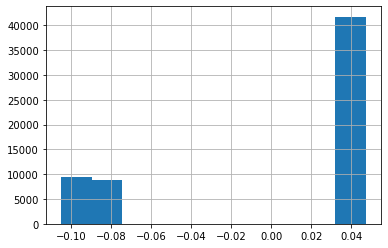

In [119]:
encoder = WOEEncoder(cols=["REF"])
encoder.fit_transform(data.drop(columns="CLASS"), data["CLASS"])["REF"].hist()

In [120]:
training_data["Consequence_values"] = pd.Series(np.zeros(training_data.tail(1).index+1), dtype='float')
training_data["Consequence_cat"] = pd.Series(dtype='bool')
encoder = WOEEncoder(cols=["Consequence_cat"])
for consequence in Consequence_values:
    training_data["Consequence_cat"] = training_data["Consequence"].apply(lambda x: consequence in x)
    training_data["Consequence_wao"] = encoder.fit_transform(training_data["Consequence_cat"], training_data["CLASS"])
    training_data["Consequence_values"] = training_data["Consequence_values"] + training_data["Consequence_wao"]

training_data["Consequence_len"] = training_data["Consequence"].apply(literal_eval).apply(len)
training_data["Consequence"] = training_data["Consequence_values"] / training_data["Consequence_len"]
training_data = training_data.drop(columns=["Consequence_values", "Consequence_cat", "Consequence_wao", "Consequence_len"])
training_data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM,Consequence_len
0,0,1168180,2,1,['not_specified'],1,0,0.080191,2,193,1644,0.033481,3,1,2,0,0.321582,1.053,3,0.10020,1,1.000000,5,1
1,0,1470752,2,0,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,0.080191,2,2084,448,0.032646,12,0,1,0,0.313746,31.000,10,0.00000,1,1.000000,0,1
3,0,2160305,2,0,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.080191,2,1845,1832,0.006362,5,1,4,3,0.217631,22.500,16,0.00000,1,0.142857,3,1
4,0,2160305,2,3,"['Shprintzen', 'Goldberg_syndrome']",33,0,0.080191,2,1845,1832,0.006362,5,1,4,3,0.217631,24.700,2,0.00000,1,0.142857,0,1
5,0,2160554,2,1,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.080191,2,1845,1832,0.022364,5,1,4,3,0.217631,23.700,15,0.00000,1,0.142857,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,3,2,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,-0.039890,1,684,61,0.354794,15,0,4,3,0.001580,0.105,0,0.13923,1,0.538462,7,1
65184,22,154159118,1,3,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,0.080191,2,684,61,0.270573,17,0,2,0,0.001580,0.002,8,0.00130,1,0.538462,6,1
65185,22,154194886,1,3,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,-0.039890,1,684,61,0.099651,0,0,4,3,0.001580,12.850,0,0.01110,1,0.307692,7,1
65186,22,154490187,3,1,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,-0.039890,1,1668,1737,0.049780,16,0,4,3,0.255614,0.130,0,0.00030,1,1.000000,7,1


In [121]:
training_data["CLNDN_values"] = pd.Series(np.zeros(training_data.tail(1).index+1), dtype='float')
training_data["CLNDN_cat"] = pd.Series(dtype='bool')
encoder = WOEEncoder(cols=["CLNDN_cat"])
for clndn in CLNDN_values:
    training_data["CLNDN_cat"] = training_data["CLNDN"].apply(lambda x: clndn in x)
    training_data["CLNDN_wao"] = encoder.fit_transform(training_data["CLNDN_cat"], training_data["CLASS"])
    training_data["CLNDN_values"] = training_data["CLNDN_values"] + training_data["CLNDN_wao"]

training_data["CLNDN_len"] = training_data["CLNDN"].apply(literal_eval).apply(len)
training_data["CLNDN"] = training_data["CLNDN_values"] / training_data["CLNDN_len"]
training_data = training_data.drop(columns=["CLNDN_values", "CLNDN_cat", "CLNDN_wao"])
training_data

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM,Consequence_len,CLNDN_len
0,0,1168180,2,1,-1.488676,1,0,0.080191,2,193,1644,0.033481,3,1,2,0,0.321582,1.053,3,0.10020,1,1.000000,5,1,1
1,0,1470752,2,0,-0.775284,1,0,0.080191,2,2084,448,0.032646,12,0,1,0,0.313746,31.000,10,0.00000,1,1.000000,0,1,2
3,0,2160305,2,0,-0.674757,33,0,0.080191,2,1845,1832,0.006362,5,1,4,3,0.217631,22.500,16,0.00000,1,0.142857,3,1,3
4,0,2160305,2,3,-1.262813,33,0,0.080191,2,1845,1832,0.006362,5,1,4,3,0.217631,24.700,2,0.00000,1,0.142857,0,1,2
5,0,2160554,2,1,-0.674757,33,0,0.080191,2,1845,1832,0.022364,5,1,4,3,0.217631,23.700,15,0.00000,1,0.142857,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,3,2,-0.285864,1,0,-0.039890,1,684,61,0.354794,15,0,4,3,0.001580,0.105,0,0.13923,1,0.538462,7,1,4
65184,22,154159118,1,3,-0.216447,1,1,0.080191,2,684,61,0.270573,17,0,2,0,0.001580,0.002,8,0.00130,1,0.538462,6,1,3
65185,22,154194886,1,3,-0.216447,1,0,-0.039890,1,684,61,0.099651,0,0,4,3,0.001580,12.850,0,0.01110,1,0.307692,7,1,3
65186,22,154490187,3,1,-0.043136,1,0,-0.039890,1,1668,1737,0.049780,16,0,4,3,0.255614,0.130,0,0.00030,1,1.000000,7,1,4


In [122]:
training_data = training_data.dropna()
ones = training_data[training_data["CLASS"] == 1]
zeros =  training_data[training_data["CLASS"] == 0]

In [123]:
zeros = zeros.sample(n=len(ones))

In [124]:
training_data = pd.concat([ones, zeros])

In [125]:
X, y = training_data.drop(columns="CLASS"), training_data["CLASS"] 

In [126]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.8, random_state=2, stratify=y)

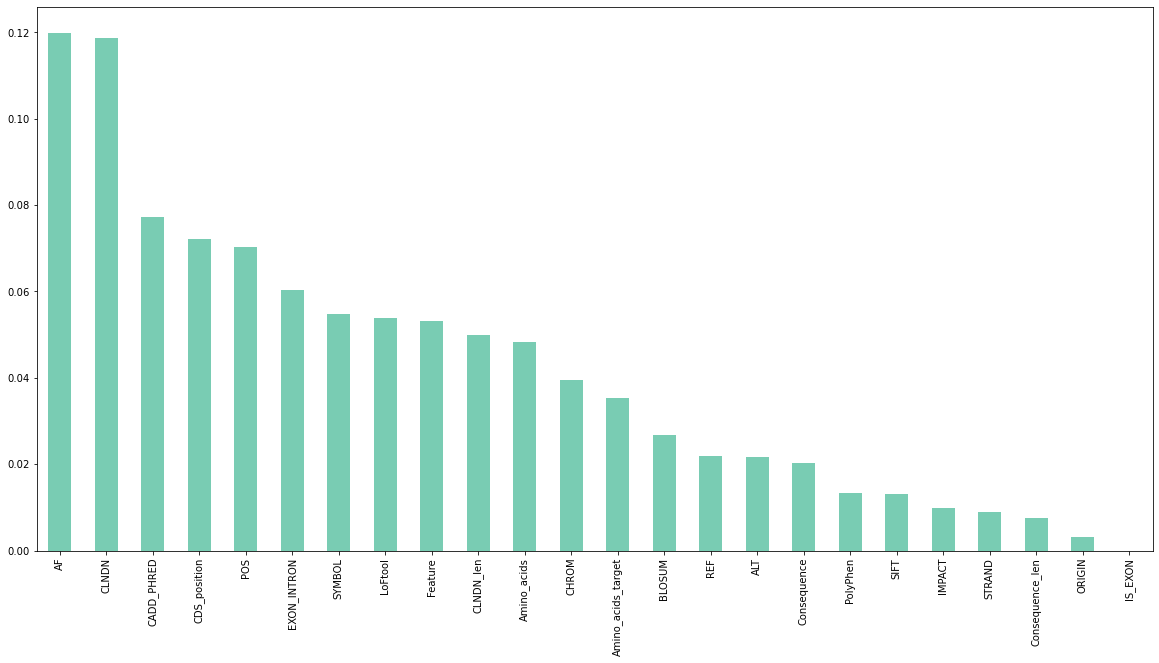

In [127]:
clc = RandomForestClassifier()
clc.fit(train_X, train_y)
features = train_X.columns
importances = clc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(len(indices)).plot(kind='bar',color = '#79CCB3');

In [128]:
f1_score(train_y, clc.predict(train_X))

1.0

In [129]:
f1_score(test_y, clc.predict(test_X))

0.7076158192090395